In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import ampyl
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

## Construct the $\rho \pi$ index space

In [3]:
fc = ampyl.FlavorChannel(3, isospin_value=2)
fcs = ampyl.FlavorChannelSpace(fc_list=[fc])
fvs = ampyl.FiniteVolumeSetup()
tbis = ampyl.ThreeBodyInteractionScheme()

qcis = ampyl.QCIndexSpace(fcs=fcs, fvs=fvs, tbis=tbis, Emax=5.0, Lmax=6.0)
print(qcis.proj_dict['summary'])
print('\n', qcis.proj_dict['best_irreps'])

kellm space has size 228

    A1PLUS  covers 12x1 = 12 slots
    A2PLUS  covers 4x1 = 4 slots
    EPLUS   covers 14x2 = 28 slots
    T1PLUS  covers 10x3 = 30 slots
    T2PLUS  covers 13x3 = 39 slots
    A1MINUS covers 1x1 = 1 slots
    A2MINUS covers 4x1 = 4 slots
    EMINUS  covers 4x2 = 8 slots
    T1MINUS covers 21x3 = 63 slots
    T2MINUS covers 13x3 = 39 slots

total is 228 
total matches size of kellm space

 [('A1PLUS', 0), ('A2PLUS', 0), ('EPLUS', 1), ('T1PLUS', 1), ('T2PLUS', 1), ('A1MINUS', 0), ('A2MINUS', 0), ('EMINUS', 0), ('T1MINUS', 1), ('T2MINUS', 0)]


## Evaluate the $\rho \pi$ quantization condition

The K-matrix parameters are passed using `k_params`. In this case we have a single flavor channel with two spectator channels. Each spectaor channel has a single free parameter (the scattering volume for the $I_{\pi \pi}=1$ channel ($a_\rho$) and the scattering length for the $I_{\pi \pi} = 2$ channel ($a_0$)). The three-particle interaction is also described by a single constant ($\alpha$).

This leads to the following structure for `k_params`:

`k_params = [[[a_rho], [a_0]], [alpha]]`.

This structure, populated with zeroes, is given by `qcis.default_k_params()`.

The zero-crossing in the plot below is an interacting solution.

(-2.0, 2.0)

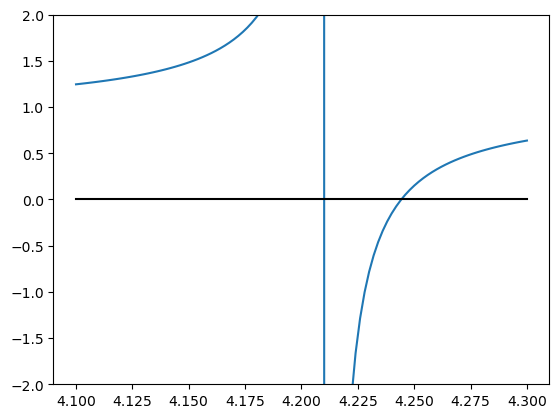

In [4]:
k_params = [[[0.05], [0.05]], [0.0]]
qc = ampyl.QC(qcis=qcis)
E = 5.0
L = 5.0
E_vals = np.arange(4.1, 4.3, 0.002)
qc_vals = []

for E in E_vals:
    qc_tmp = qc.get_value(E=E, L=L, k_params=k_params, irrep=('A1PLUS', 0))
    qc_vals = qc_vals+[qc_tmp]
qc_vals = np.array(qc_vals)
plt.plot(E_vals, qc_vals)
plt.plot([4.1, 4.3], [0.]*2, 'k')
plt.ylim(-2., 2.)

## Evaluate $E_n(L)$ vs $L$

The final step is to use `root_scalar` to find the solution as a function of $L$. This works well if the solution can be bracketed, in this case using the nearby non-interaction solution.

In [5]:
k_params = [[[0.05], [0.05]], [0.0]]
irrep=('A1PLUS', 0)
L_vals = np.arange(3.81, 6.0, 0.2)
delta1 = 0.00001
delta2 = 0.1
En_vals = []
for L in L_vals:
    E_non_int = 1.0+2.0*np.sqrt(1.0+4.0*np.pi**2/L**2)
    sol_tmp = root_scalar(qc.get_value, args=(L, k_params, True, irrep),
                          bracket=[E_non_int+delta1, E_non_int+delta2]).root
    En_vals = En_vals+[sol_tmp]
En_vals = np.array(En_vals)

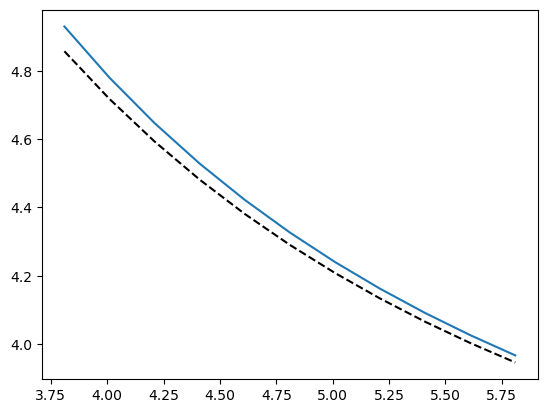

In [6]:
E_non_int_vals = 1.0+2.0*np.sqrt(1.0+4.0*np.pi**2/L_vals**2)
plt.plot(L_vals, En_vals)
plt.plot(L_vals, E_non_int_vals, 'k--')